In [1]:
# project: p8
# submitter: hko26
# partner: yeo9 

In [2]:
import csv

In [3]:
def get_mapping(path):  
    map_file = open(path, encoding = 'utf-8')
    map_reader = csv.reader(map_file)
    map_data = list(map_reader) 
    map_dict = {}
    for i in map_data:
        map_dict[i[0]] = i[1]
    return map_dict

In [4]:
#Q1: What is returned by your get_mapping("small_mapping.csv") function?
get_mapping("small_mapping.csv")

{'nm0000131': 'John Cusack',
 'nm0000154': 'Mel Gibson',
 'nm0000163': 'Dustin Hoffman',
 'nm0000418': 'Danny Glover',
 'nm0000432': 'Gene Hackman',
 'nm0000997': 'Gary Busey',
 'nm0001149': 'Richard Donner',
 'nm0001219': 'Gary Fleder',
 'nm0752751': 'Mitchell Ryan',
 'tt0313542': 'Runaway Jury',
 'tt0093409': 'Lethal Weapon'}

In [5]:
#Q2: What is the value associated with the key "nm0001219"?
get_mapping("small_mapping.csv")["nm0001219"]

'Gary Fleder'

In [6]:
#Q3: What are the values in the mapping associated with keys beginning with "nm"?
def alphabet_code(path, alphabets):
    values_list = []
    for i in get_mapping(path):
        if alphabets in i:
            values_list.append(get_mapping(path)[i])
    
    return values_list

alphabet_code("small_mapping.csv", "nm")

['John Cusack',
 'Mel Gibson',
 'Dustin Hoffman',
 'Danny Glover',
 'Gene Hackman',
 'Gary Busey',
 'Richard Donner',
 'Gary Fleder',
 'Mitchell Ryan']

In [7]:
#Q4: Which keys in the mapping map to people with a last name which starts with "G"?
def last_name_startswith(path, letter):
    letter_list = []
    split_name = []
    for i in get_mapping(path):
        if get_mapping(path)[i].split(" ")[-1].startswith("G"):
            letter_list.append(i)
    return letter_list

last_name_startswith("small_mapping.csv", "G")

['nm0000154', 'nm0000418']

In [8]:
def get_small_movies(path):
    movies_file = open(path)
    movies_reader = csv.reader(movies_file)
    movies_data = list(movies_reader) 
    return movies_data
get_small_movies("small_movies.csv")

[['title', 'year', 'rating', 'directors', 'actors', 'genres'],
 ['tt0313542',
  '2003',
  '7.1',
  'nm0001219',
  'nm0000131,nm0000432,nm0000163',
  'Crime,Drama,Thriller'],
 ['tt0093409',
  '1987',
  '7.6',
  'nm0001149',
  'nm0000154,nm0000418,nm0000997,nm0752751',
  'Action,Crime,Thriller']]

In [9]:
#Q5: What does get_raw_movies("small_movies.csv") return?
def get_raw_movies(path):
    all_data_list = get_small_movies(path)   
    header = all_data_list[0]
    data = all_data_list[1:]
    final_list = []
    
    for movie in data:
        raw_movies_dict = {}
        for i in range(len(header)):
            raw_movies_dict[header[i]] = movie[i]
        
        for keys in raw_movies_dict:
            if keys == 'title':
                raw_movies_dict[keys] = raw_movies_dict[keys]
            elif keys == 'year':
                raw_movies_dict[keys] = int(raw_movies_dict[keys])
            elif keys == 'rating':
                raw_movies_dict[keys] = float(raw_movies_dict[keys])
            elif keys == 'directors' or keys == 'actors' or keys == 'genres':
                raw_movies_dict[keys] = raw_movies_dict[keys].split(",")
        final_list.append(raw_movies_dict)
    return final_list
get_raw_movies("small_movies.csv")

[{'title': 'tt0313542',
  'year': 2003,
  'rating': 7.1,
  'directors': ['nm0001219'],
  'actors': ['nm0000131', 'nm0000432', 'nm0000163'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'tt0093409',
  'year': 1987,
  'rating': 7.6,
  'directors': ['nm0001149'],
  'actors': ['nm0000154', 'nm0000418', 'nm0000997', 'nm0752751'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [10]:
#Q6: How many actors did the movie at index 1 have?
def num_actors(path, idx):
    total_list = get_raw_movies(path)
    actors = total_list[idx]['actors']
    
    return len(actors)
    
num_actors("small_movies.csv", 1)

4

In [11]:
#Q7: What is the ID of the first actor listed for the move at index 0?
def get_actors_id(path, idx, order):
    total_list = get_raw_movies(path)
    actors = total_list[idx]['actors']
    
    return actors[order-1]

get_actors_id("small_movies.csv", 0, 1)

'nm0000131'

In [12]:
def get_movies(movies_path, mapping_path):
    total_movies = get_raw_movies(movies_path)
    total_mapping = get_mapping(mapping_path)
    
    for partial_dict in total_movies:
        for keys in partial_dict:           
            if keys == 'title':
                partial_dict[keys] = total_mapping[partial_dict[keys]]
              
            elif keys == 'directors' or keys == 'actors':
                new_list = []
                for key in partial_dict[keys]:
                    new_list.append(total_mapping[key])
                partial_dict[keys] = new_list
                    
    return total_movies
           
small = get_movies("small_movies.csv", "small_mapping.csv")

In [13]:
#Q8: what is small[1]["title"]?
small[1]["title"]

'Lethal Weapon'

In [14]:
#Q9: What is small[0]["actors"]?
small[0]["actors"]

['John Cusack', 'Gene Hackman', 'Dustin Hoffman']

In [15]:
#Q10: What is small[-1]["directors"]?
small[-1]["directors"]

['Richard Donner']

In [16]:
movies = get_movies("movies.csv", "mapping.csv")

In [17]:
#Q11: What are the last 3 rows in movies?
movies[-3:]

[{'title': 'Fortitude and Glory: Angelo Dundee and His Fighters',
  'year': 2012,
  'rating': 7.2,
  'directors': ['Chris Tasara'],
  'actors': ['Angelo Dundee', 'George Foreman', 'Freddie Roach'],
  'genres': ['Sport']},
 {'title': 'Ivanhoe',
  'year': 1952,
  'rating': 6.8,
  'directors': ['Richard Thorpe'],
  'actors': ['Robert Taylor', 'George Sanders'],
  'genres': ['Adventure', 'Drama', 'History']},
 {'title': 'The Great Gatsby',
  'year': 1949,
  'rating': 6.6,
  'directors': ['Elliott Nugent'],
  'actors': ['Alan Ladd', 'Macdonald Carey'],
  'genres': ['Drama']}]

In [18]:
#Q12: What are the first 2 rows in movies?
movies[:2]

[{'title': 'The Big Wedding',
  'year': 2013,
  'rating': 5.6,
  'directors': ['Justin Zackham'],
  'actors': ['Robert De Niro'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Affair of the Necklace',
  'year': 2001,
  'rating': 6.1,
  'directors': ['Charles Shyer'],
  'actors': ['Simon Baker', 'Jonathan Pryce', 'Adrien Brody'],
  'genres': ['Drama', 'History', 'Romance']}]

In [19]:
def filter_movies_by_year(movies, year):
    i = 0
    while i < len(movies):
        if movies[i]["year"] != year:
            movies.pop(i)
        else:
            i += 1
    return movies

In [20]:
#Q13: What are the movies from 1929?
filter_movies_by_year(movies, 1929)

[{'title': 'Redskin',
  'year': 1929,
  'rating': 7.0,
  'directors': ['Victor Schertzinger'],
  'actors': ['Richard Dix', 'Tully Marshall', 'George Regas'],
  'genres': ['Adventure', 'Drama', 'Western']},
 {'title': 'The Girl in the Show',
  'year': 1929,
  'rating': 6.5,
  'directors': ['Edgar Selwyn'],
  'actors': ['Raymond Hackett', 'Edward J. Nugent'],
  'genres': ['Comedy']},
 {'title': 'Atlantic',
  'year': 1929,
  'rating': 5.5,
  'directors': ['Ewald André Dupont'],
  'actors': ['Franklin Dyall', 'John Stuart'],
  'genres': ['Drama']}]

In [21]:
movies = get_movies("movies.csv", "mapping.csv")

In [22]:
#Q14: What are the movies from 1931?
filter_movies_by_year(movies, 1931)

[{'title': 'Arizona',
  'year': 1931,
  'rating': 6.0,
  'directors': ['George B. Seitz'],
  'actors': ['John Wayne', 'Forrest Stanley'],
  'genres': ['Drama', 'Romance']},
 {'title': 'City Lights',
  'year': 1931,
  'rating': 8.5,
  'directors': ['Charles Chaplin'],
  'actors': ['Charles Chaplin', 'Harry Myers'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Range Feud',
  'year': 1931,
  'rating': 5.8,
  'directors': ['D. Ross Lederman'],
  'actors': ['Buck Jones', 'John Wayne', 'Edward LeSaint'],
  'genres': ['Mystery', 'Western']}]

In [23]:
#Q15: How many unique actor names are there in the dataset?
def count_keys(movies, target):
    
    target_list = []
    for partial_dict in movies:
        for keys in partial_dict:
            if keys == target:
                target_list.append(partial_dict[keys])    
    
    final_list = []
    for i in range(len(target_list)): 
        for j in range(len(target_list[i])):       
                final_list.append(target_list[i][j])
    
    final_list = set(final_list)
    return len(final_list)
    
movies = get_movies("movies.csv", "mapping.csv")
count_keys(movies, 'actors')       

2605

In [24]:
#Q16: How many unique genres are there in the dataset?
count_keys(movies, 'genres')   

18

In [25]:
#Q17: Which movie title in the dataset appears last alphabetically?
def arrange_title(movies):
    title_list = []
    for partial_dict in movies:
        for keys in partial_dict:
            if keys == 'title':
                title_list.append(partial_dict[keys])
    
    title_list = sorted(title_list)
    return title_list[-1]
    
arrange_title(movies)

'Zorba the Greek'

In [26]:
#Q18: What is the average movie rating?
def avg_rating(movies):
    sum = 0
    for partial_dict in movies:
        for keys in partial_dict:
            if keys == 'rating':
                sum += partial_dict[keys]
                
    avg = sum / len(movies)
    return avg

avg_rating(movies)

6.401659528907912

In [27]:
#Q19: What is the name of the highest rated movie?
def highest_rated_movie(movies):
    rating = 0
    for partial_dict in movies:
        for keys in partial_dict:
            if keys == 'rating':
                if partial_dict[keys] > rating:
                    rating = partial_dict[keys]
                    name = partial_dict['title']
    return name

highest_rated_movie(movies)

'The Godfather'

In [28]:
#Q20: What is the oldest movie title in the dataset?
def oldest_movie(movies):
    min_year = 1950
    for partial_dict in movies:
        for keys in partial_dict:
            if keys == 'year':
                if min_year > partial_dict[keys]:
                    min_year = partial_dict[keys]
                    name = partial_dict['title']
    return name

oldest_movie(movies)

'Shoulder Arms'

In [29]:
def bucketize(movie_list, movie_key):
    new_dict= {}
    for partial_dict in movie_list:
        if movie_key != "genres" and movie_key != "actors" and movie_key != "directors": # if values are not lists...
            if partial_dict[movie_key] not in new_dict: # if the keyword is being newly inserted...
                new_dict[partial_dict[movie_key]] = [partial_dict]          
            else: # if the keyword is already appended in the dictionary....
                new_dict[partial_dict[movie_key]].append(partial_dict)  # append a new value to the value of list 
        else: # if values are lists...
            for i in range(len(partial_dict[movie_key])): # iterate 'the length of values' times ex) 'genres' = ['g1', 'g2', 'g3']
                if partial_dict[movie_key][i] not in new_dict: 
                    new_dict[partial_dict[movie_key][i]] = [partial_dict] 
                else:
                    new_dict[partial_dict[movie_key][i]].append(partial_dict)        
                 
    return new_dict
buckets = bucketize(small, "year")
buckets

{2003: [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 1987: [{'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}]}

In [30]:
test_movies = [
{"title": "A", "year": 2018, "style": "short", "genres": ["g1"]},
{"title": "B", "year": 2018, "style": "long",  "genres": ["g2"]},
{"title": "C", "year": 2019, "style": "short", "genres": ["g3"]},
{"title": "D", "year": 2019, "style": "long", "genres": ["g1", "g2", "g3"]},
]

In [31]:
#Q21: What is bucketize(test_movies, "style")?
bucketize(test_movies, "style")

{'short': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']}],
 'long': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [32]:
#Q22: What is bucketize(test_movies, "year")?
bucketize(test_movies, "year")

{2018: [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']}],
 2019: [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [33]:
#Q23: What is bucketize(test_movies, "genres")?
bucketize(test_movies, "genres")

{'g1': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g2': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g3': [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [34]:
#Q24: What is bucketize(small, "genres")?
bucketize(small, "genres")

{'Crime': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}],
 'Drama': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 'Thriller': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson',

In [35]:
#Q25: How many different unique directors appear in the small dataset?
len(bucketize(small, "directors"))

2

In [36]:
#Q26: How many unique directors appear in the full dataset?
len(bucketize(movies, "directors"))

1247

In [37]:
#Q27: How many movies are there of each genre?
def count_nums(movie_list, movie_key):
    bucket = bucketize(movie_list, movie_key)
    count_dict = {}
    
    for i in bucket:
        count_dict[i] = len(bucket[i])
    return count_dict

count_nums(movies, 'genres')

{'Comedy': 485,
 'Drama': 1094,
 'Romance': 352,
 'History': 73,
 'Family': 85,
 'Mystery': 121,
 'Thriller': 250,
 'Action': 299,
 'Crime': 357,
 'Adventure': 283,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 48,
 'Fantasy': 59,
 'War': 99,
 'Sci-Fi': 69,
 'Horror': 85}

In [38]:
%matplotlib inline

In [39]:
import matplotlib, pandas

def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

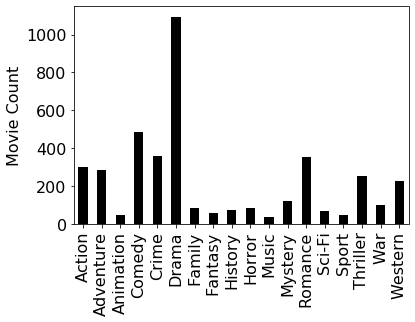

In [40]:
#Q28: How many movies are there of each genre? (plot your answer)
plot_dict(count_nums(movies, 'genres'), label="Movie Count")

In [41]:
def count_bucket_nums(bucket, movie_key):
    count_dict = {}
    for genre_keys in bucket:
        count_dict[genre_keys] = len(bucket[genre_keys])
    return count_dict

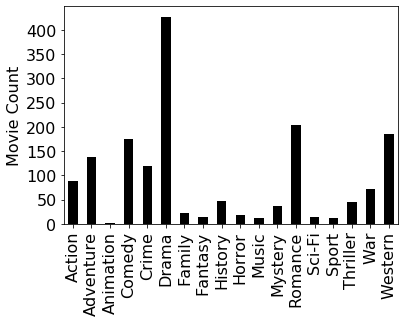

In [42]:
#Q29: How many movies are there of each genre, prior to 1970? (plot your answer)
def filter_year_after(movie_list, movie_key, year):
    new_dict = {}
    bucket = bucketize(movie_list, movie_key)
    
    for genre_keys in bucket:
        values_list = []
        for i in range(len(bucket[genre_keys])):
            if bucket[genre_keys][i]['year'] < year:
                values_list.append(bucket[genre_keys][i])
        
        new_dict[genre_keys] = values_list
    
    return new_dict
filter = count_bucket_nums(filter_year_after(movies, 'genres', 1970), 'genres')
plot_dict(filter, "Movie Count")

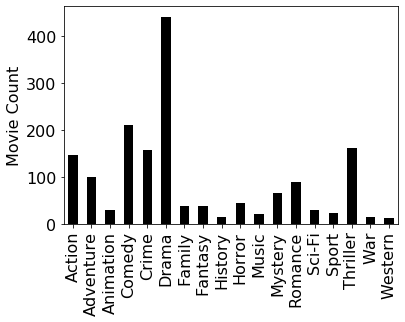

In [43]:
#Q30: How many movies are there of each genre, in or after 1990? (plot your answer)
def filter_year_before(movie_list, movie_key, year):
    new_dict = {}
    bucket = bucketize(movie_list, movie_key)
    
    for genre_keys in bucket:
        values_list = []
        for i in range(len(bucket[genre_keys])):
            if bucket[genre_keys][i]['year'] > year:
                values_list.append(bucket[genre_keys][i])
        
        new_dict[genre_keys] = values_list
    
    return new_dict

filter = count_bucket_nums(filter_year_before(movies, 'genres', 1990), 'genres')
plot_dict(filter, "Movie Count")

In [44]:
bucket = bucketize(movies, 'year')
bucket

{2013: [{'title': 'The Big Wedding',
   'year': 2013,
   'rating': 5.6,
   'directors': ['Justin Zackham'],
   'actors': ['Robert De Niro'],
   'genres': ['Comedy', 'Drama', 'Romance']},
  {'title': 'The Family',
   'year': 2013,
   'rating': 6.3,
   'directors': ['Luc Besson'],
   'actors': ['Robert De Niro', "John D'Leo"],
   'genres': ['Comedy', 'Crime', 'Thriller']},
  {'title': 'The Tale of the Princess Kaguya',
   'year': 2013,
   'rating': 8.1,
   'directors': ['Isao Takahata'],
   'actors': ['James Caan', 'James Marsden'],
   'genres': ['Adventure', 'Animation', 'Drama']},
  {'title': 'R.I.P.D.',
   'year': 2013,
   'rating': 5.6,
   'directors': ['Robert Schwentke'],
   'actors': ['Ryan Reynolds', 'Jeff Bridges', 'Kevin Bacon'],
   'genres': ['Action', 'Adventure', 'Comedy']},
  {'title': 'We Are Not Animals',
   'year': 2013,
   'rating': 5.3,
   'directors': ['Alejandro Agresti'],
   'actors': ['John Cusack', 'Paul Hipp', 'Kevin Morris', 'Alejandro Agresti'],
   'genres': ['

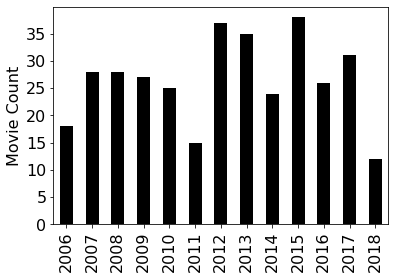

In [45]:
#Q31: How many movies have there been per year, after (not including) 2005? (plot your answer)
def filter_year(movie_list, movie_key, year):
    new_dict = {}
    bucket = bucketize(movie_list, movie_key)
    
    for key_year in bucket:     
        values_list = []
        for i in range(len(bucket[key_year])):
            if key_year > year:
                values_list.append(bucket[key_year][i])
                new_dict[key_year] = values_list 
    return new_dict

filter = count_bucket_nums(filter_year(movies, 'year', 2005), 'year')
plot_dict(filter, "Movie Count")

In [46]:
#Q32: What are the acting career spans of the actors who have acted for at least 45 years?
def career_span(movie_list, movie_key, years):
    bucket = bucketize(movie_list, movie_key)
    philmography = {}
    
    for key_name in bucket:
        values_list = []
        for i in range(len(bucket[key_name])):
            values_list.append(bucket[key_name][i]['year'])      
        values_list = sorted(values_list)     
        span = values_list[-1] - values_list[0] # span is equivalent to the first value - last value of sorted list. 
        if span >= years: # only add spans bigger than the given minimum span.
            philmography[key_name] = span
    return philmography

career_span(movies, 'actors', 45)

{'Robert De Niro': 49,
 'Kurt Russell': 50,
 'John Wayne': 46,
 'Mickey Rooney': 75,
 'Robert Mitchum': 51,
 'Henry Fonda': 46,
 'Glenn Ford': 52,
 'Jeff Bridges': 48,
 'James Caan': 52,
 'Anthony Quinn': 61,
 'Marlon Brando': 49,
 'Tony Curtis': 45,
 'Ernest Borgnine': 47,
 'Rod Steiger': 45,
 'George Burns': 60,
 'Bruce Dern': 45,
 'Dean Stockwell': 53}

In [47]:
#Q33: What are the directing career spans of the directors who have directed for at least 25 years?
career_span(movies, 'directors', 25)

{'Howard Hawks': 42,
 'Charles Chaplin': 34,
 'J. Lee Thompson': 28,
 'Henry Hathaway': 36,
 'John Ford': 25,
 'Stanley Kubrick': 46,
 'Taylor Hackford': 32,
 'Cecil B. DeMille': 30,
 'Lee H. Katzin': 30,
 'John Sturges': 25,
 'Richard Fleischer': 32,
 'Don Siegel': 27,
 'Sidney Lumet': 33,
 'George Sherman': 33,
 'John Huston': 30,
 'Burt Kennedy': 25,
 'William A. Graham': 25,
 'Richard Thorpe': 29,
 'Robert Siodmak': 30,
 'Eldar Ryazanov': 31,
 'Martin Ritt': 32}

In [48]:
def row_ranking(row):
    return row["span"]

def top_n_span(buckets, n):
    # TODO: spans should be a dictionary mapping name to career span
    spans = buckets
    rows = []
    for name in spans:
        span = spans[name]
        rows.append({"name": name, "span": span})
    
    rows.sort(key=row_ranking, reverse=True)
    spans_list = []
    for i in range(n):
        spans_list.append(rows[i])
    
    return spans_list

In [49]:
#Q34: Who are the top 10 actors with the longest careers?
buckets = career_span(movies, 'actors', 10)
top_n_span(buckets, 10)

[{'name': 'Mickey Rooney', 'span': 75},
 {'name': 'Anthony Quinn', 'span': 61},
 {'name': 'George Burns', 'span': 60},
 {'name': 'Dean Stockwell', 'span': 53},
 {'name': 'Glenn Ford', 'span': 52},
 {'name': 'James Caan', 'span': 52},
 {'name': 'Robert Mitchum', 'span': 51},
 {'name': 'Kurt Russell', 'span': 50},
 {'name': 'Robert De Niro', 'span': 49},
 {'name': 'Marlon Brando', 'span': 49}]

In [50]:
#Q35: Who are the top twenty one directors with the longest careers?
buckets = career_span(movies, 'directors', 10)
top_n_span(buckets, 20)

[{'name': 'Stanley Kubrick', 'span': 46},
 {'name': 'Howard Hawks', 'span': 42},
 {'name': 'Henry Hathaway', 'span': 36},
 {'name': 'Charles Chaplin', 'span': 34},
 {'name': 'Sidney Lumet', 'span': 33},
 {'name': 'George Sherman', 'span': 33},
 {'name': 'Taylor Hackford', 'span': 32},
 {'name': 'Richard Fleischer', 'span': 32},
 {'name': 'Martin Ritt', 'span': 32},
 {'name': 'Eldar Ryazanov', 'span': 31},
 {'name': 'Cecil B. DeMille', 'span': 30},
 {'name': 'Lee H. Katzin', 'span': 30},
 {'name': 'John Huston', 'span': 30},
 {'name': 'Robert Siodmak', 'span': 30},
 {'name': 'Richard Thorpe', 'span': 29},
 {'name': 'J. Lee Thompson', 'span': 28},
 {'name': 'Don Siegel', 'span': 27},
 {'name': 'John Ford', 'span': 25},
 {'name': 'John Sturges', 'span': 25},
 {'name': 'Burt Kennedy', 'span': 25}]

In [51]:
def row_ranking(row):
    return row["rating"]

def get_median_ratings(bucket, movie_key, names):
    ratings_list = []
    for i in range(len(bucket[names])):
        ratings_list.append(bucket[names][i]['rating'])  
    rating = get_median(ratings_list)
    
    return rating

In [52]:
def get_median(list):
    list = sorted(list)
    if len(list) % 2 == 1:    
        
        return list[int(len(list) / 2)]
    
    elif len(list) % 2 == 0:
        left_num = list[int(len(list) / 2) - 1]
        right_num = list[int(int(len(list)) / 2)]
        
        return float(left_num + right_num) / 2

In [53]:
#Q36: Who are the nine best actors?
def top_n_ratings(movie_key, n, min_nums = 0):
    count = count_bucket_nums(bucket, movie_key)
    total_list = []
      
    for names in bucket:
        name_list = []
        name_list.append(names)
        rating_dict = {'name': None, 'rating': 0.0, 'count': 0}
        rating_dict['name'] = name_list[0]             
        rating_dict['count'] = count[names]
        
        if rating_dict['count'] < min_nums: # skip the count which is less than the minimum num.
            continue
        
        rating_dict['rating'] = get_median_ratings(bucket, movie_key, names)
        total_list.append(rating_dict)
    
    total_list.sort(key=row_ranking, reverse=True)
    
    final_list = []
    for i in range(n):
        final_list.append(total_list[i])
    
    return final_list
    
bucket = bucketize(movies, 'actors')   
top_n_ratings('actors', 9)

[{'name': 'Heath Ledger', 'rating': 9.0, 'count': 1},
 {'name': 'John Fiedler', 'rating': 8.9, 'count': 1},
 {'name': 'Aldo Giuffrè', 'rating': 8.9, 'count': 1},
 {'name': 'Steven Williams', 'rating': 8.8, 'count': 1},
 {'name': 'Daniel Roebuck', 'rating': 8.8, 'count': 1},
 {'name': 'Joseph Gordon-Levitt', 'rating': 8.8, 'count': 1},
 {'name': 'Miyu Irino', 'rating': 8.6, 'count': 1},
 {'name': 'Andrew Kevin Walker', 'rating': 8.6, 'count': 1},
 {'name': 'Ken Watanabe', 'rating': 8.55, 'count': 2}]

In [54]:
#Q37: Who are the twelve best directors?
bucket = bucketize(movies, 'directors')
top_n_ratings('directors', 12)

[{'name': 'James Marlowe', 'rating': 8.8, 'count': 1},
 {'name': 'Kirk Wise', 'rating': 8.6, 'count': 1},
 {'name': 'David Fincher', 'rating': 8.6, 'count': 1},
 {'name': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'name': 'Leonid Gayday', 'rating': 8.4, 'count': 5},
 {'name': 'Adrian Molina', 'rating': 8.4, 'count': 1},
 {'name': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'name': 'Sergio Leone', 'rating': 8.3, 'count': 7},
 {'name': 'Satyajit Ray', 'rating': 8.2, 'count': 9},
 {'name': 'Moustapha Akkad', 'rating': 8.2, 'count': 1},
 {'name': 'Andrew Grieve', 'rating': 8.2, 'count': 6},
 {'name': 'Danny Boyle', 'rating': 8.2, 'count': 1}]

In [55]:
#Q38: Who are the fourteen best actors, if we only consider those who have acted in at least 5 movies?
bucket = bucketize(movies, 'actors')
top_n_ratings('actors', 14, min_nums = 5)

[{'name': 'Henry Bergman', 'rating': 8.2, 'count': 5},
 {'name': 'Ioan Gruffudd', 'rating': 8.2, 'count': 6},
 {'name': 'Robert Lindsay', 'rating': 8.2, 'count': 6},
 {'name': 'Charles Chaplin', 'rating': 8.149999999999999, 'count': 10},
 {'name': 'Bradley Cooper', 'rating': 7.3, 'count': 5},
 {'name': 'Joe Pesci', 'rating': 7.2, 'count': 7},
 {'name': 'Robin Williams', 'rating': 7.2, 'count': 5},
 {'name': 'Kirk Douglas', 'rating': 7.15, 'count': 12},
 {'name': 'Ward Bond', 'rating': 7.1, 'count': 10},
 {'name': 'Gregory Peck', 'rating': 7.1, 'count': 5},
 {'name': 'Tom Hanks', 'rating': 7.1, 'count': 6},
 {'name': 'Al Pacino', 'rating': 7.050000000000001, 'count': 8},
 {'name': 'Ben Johnson', 'rating': 7.050000000000001, 'count': 6},
 {'name': 'Charles Coburn', 'rating': 7.0, 'count': 9}]

In [56]:
#Q39: Who are the sixteen best actors, if we only consider those who have acted in at least 30 movies?
bucket = bucketize(movies, 'actors')
top_n_ratings('actors', 16, min_nums = 30)

[{'name': 'Henry Fonda', 'rating': 6.9, 'count': 77},
 {'name': 'Mickey Rooney', 'rating': 6.7, 'count': 82},
 {'name': 'Anthony Quinn', 'rating': 6.7, 'count': 79},
 {'name': 'Brian Donlevy', 'rating': 6.7, 'count': 47},
 {'name': 'Robert Mitchum', 'rating': 6.65, 'count': 74},
 {'name': 'Glenn Ford', 'rating': 6.6, 'count': 74},
 {'name': 'George Sanders', 'rating': 6.6, 'count': 74},
 {'name': 'Robert De Niro', 'rating': 6.55, 'count': 74},
 {'name': 'Randolph Scott', 'rating': 6.5, 'count': 76},
 {'name': 'Jeff Bridges', 'rating': 6.5, 'count': 59},
 {'name': 'Ned Beatty', 'rating': 6.45, 'count': 50},
 {'name': 'Kurt Russell', 'rating': 6.4, 'count': 46},
 {'name': 'John Wayne', 'rating': 6.4, 'count': 130},
 {'name': 'John Cusack', 'rating': 6.4, 'count': 52},
 {'name': 'Danny Glover', 'rating': 6.4, 'count': 51},
 {'name': 'Dennis Quaid', 'rating': 6.35, 'count': 60}]

In [57]:
#Q40: Who are the eight best directors, if we only count directors having at least 8 movies?
bucket = bucketize(movies, 'directors')
top_n_ratings('actors', 8, min_nums = 8)

[{'name': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'name': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'name': 'Satyajit Ray', 'rating': 8.2, 'count': 9},
 {'name': 'Charles Chaplin', 'rating': 8.1, 'count': 11},
 {'name': 'Hayao Miyazaki', 'rating': 8.1, 'count': 9},
 {'name': 'Martin Scorsese', 'rating': 8.0, 'count': 8},
 {'name': 'John Ford', 'rating': 7.3, 'count': 21},
 {'name': 'Fritz Lang', 'rating': 7.2, 'count': 9}]